In [28]:
import json
import numpy as np
import pandas as pd
from os import path
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
stories_json_v1 = []
with open('./output_storiesv2.json', 'r') as f:
    stories_json_v1 = stories_json_v1 + json.loads(f.read())

print(len(stories_json_v1))
print(stories_json_v1[1].keys())

407
dict_keys(['index', 'title', 'broadcasting_date', 'abstracts_list'])


In [30]:
stories_json_v0 = []
with open('./output_stories_old.json', 'r') as f:
    stories_json_v0 = stories_json_v0 + json.loads(f.read())

print(len(stories_json_v0))
print(stories_json_v0[1].keys())

323
dict_keys(['index', 'title', 'broadcasting_date', 'abstracts_list'])


In [31]:
stories_df_1 = pd.DataFrame(stories_json_v0)
stories_df_2 = pd.DataFrame(stories_json_v1)

stories_df = pd.concat([stories_df_1, stories_df_2])
stories_df = stories_df.explode('abstracts_list')
stories_df.rename(columns={'abstracts_list': 'abstract'}, inplace=True)

stories_df.head()

,index,title,broadcasting_date,abstract
0,0001,４月１５日（金曜日） ついに登場!! あっ、ドラえもんだ！ 春満開パワーアップ60分スペシャ...,2005年4月15日,ジャイアンたちから、近所の川でつったサカナを見せびらかされたのび太。「ボクたちもつりに行こ...
0,0001,４月１５日（金曜日） ついに登場!! あっ、ドラえもんだ！ 春満開パワーアップ60分スペシャ...,2005年4月15日,怒ったママから逃げるため『タイムマシン』の中にかくれた、のび太。ところが、そのあとブレー...
0,0001,４月１５日（金曜日） ついに登場!! あっ、ドラえもんだ！ 春満開パワーアップ60分スペシャ...,2005年4月15日,ある朝、のび太が学校をやめると言いだした。毎日同じことのくりかえしで、イヤになってしまっ...
1,0002,４月２２日（金曜日）「のろのろ、じたばた」「のび太のおよめさん」,2005年4月22日,「宿題がまにあわないから手伝って！」とたのんでおきながら、のん気にあそびに出かけようとする...
1,0002,４月２２日（金曜日）「のろのろ、じたばた」「のび太のおよめさん」,2005年4月22日,テストで０点を取ったのび太は「０点ばっかりののび太が、結婚できるわけない」とジャイアンたち...


In [32]:
stories_df['broadcasting_date'] = stories_df['broadcasting_date'].apply(lambda d: datetime.strptime(d, '%Y年%m月%d日'))

In [33]:
stories_df["doraemon_flag"] = stories_df["abstract"].apply(lambda x: "ドラえもん" in x)
stories_df["nobita_flag"] = stories_df["abstract"].apply(lambda x: "のび太" in x)
stories_df["sizuka_flag"] = stories_df["abstract"].apply(lambda x: "しずか" in x or "しずかちゃん" in x)
stories_df["gian_flag"] = stories_df["abstract"].apply(lambda x: "ジャイアン" in x)
stories_df["suneo_flag"] = stories_df["abstract"].apply(lambda x: "スネ夫" in x)
stories_df["dekisugi_flag"] = stories_df["abstract"].apply(lambda x: "出木杉" in x)
stories_df["dorami_flag"] = stories_df["abstract"].apply(lambda x: "ドラミ" in x)
stories_df["pawaemon_flag"] = stories_df["abstract"].apply(lambda x: "パワえもん" in x)

# stories_df.head()

In [34]:
stories_df['broadcasting_quarter'] = pd.PeriodIndex(stories_df['broadcasting_date'], freq='Q')
stories_df.head()

,index,title,broadcasting_date,abstract,doraemon_flag,nobita_flag,sizuka_flag,gian_flag,suneo_flag,dekisugi_flag,dorami_flag,pawaemon_flag,broadcasting_quarter
0,0001,４月１５日（金曜日） ついに登場!! あっ、ドラえもんだ！ 春満開パワーアップ60分スペシャ...,2005-04-15,ジャイアンたちから、近所の川でつったサカナを見せびらかされたのび太。「ボクたちもつりに行こ...,True,True,False,True,False,False,False,False,2005Q2
0,0001,４月１５日（金曜日） ついに登場!! あっ、ドラえもんだ！ 春満開パワーアップ60分スペシャ...,2005-04-15,怒ったママから逃げるため『タイムマシン』の中にかくれた、のび太。ところが、そのあとブレー...,True,True,False,False,False,False,False,False,2005Q2
0,0001,４月１５日（金曜日） ついに登場!! あっ、ドラえもんだ！ 春満開パワーアップ60分スペシャ...,2005-04-15,ある朝、のび太が学校をやめると言いだした。毎日同じことのくりかえしで、イヤになってしまっ...,True,True,False,False,False,False,False,False,2005Q2
1,0002,４月２２日（金曜日）「のろのろ、じたばた」「のび太のおよめさん」,2005-04-22,「宿題がまにあわないから手伝って！」とたのんでおきながら、のん気にあそびに出かけようとする...,True,True,False,False,False,False,False,False,2005Q2
1,0002,４月２２日（金曜日）「のろのろ、じたばた」「のび太のおよめさん」,2005-04-22,テストで０点を取ったのび太は「０点ばっかりののび太が、結婚できるわけない」とジャイアンたち...,True,True,False,True,False,False,False,False,2005Q2


In [35]:
# 年ごとの割合を算出
grouped_stories_sum_df = stories_df['index'].groupby([stories_df['broadcasting_date'].dt.year]).count()
grouped_stories_sum_df = pd.DataFrame(grouped_stories_sum_df)
grouped_stories_sum_df.reset_index(inplace=True)
grouped_stories_sum_df.rename(columns={
    'index': 'total_stories_count'
}, inplace=True)
grouped_stories_sum_df.head()

,broadcasting_date,total_stories_count
0,2005,64
1,2006,81
2,2007,65
3,2008,70
4,2009,58


In [36]:
grouped_df = stories_df.groupby([stories_df['broadcasting_date'].dt.year]).sum()
grouped_df.reset_index(inplace=True)
melt_df = pd.melt(grouped_df, id_vars=['broadcasting_date'], value_vars=['doraemon_flag', 'nobita_flag', 'sizuka_flag', 'gian_flag', 'suneo_flag', 'dekisugi_flag', 'dorami_flag', 'pawaemon_flag'])
melt_df.head()

,broadcasting_date,variable,value
0,2005,doraemon_flag,58
1,2006,doraemon_flag,73
2,2007,doraemon_flag,56
3,2008,doraemon_flag,64
4,2009,doraemon_flag,56


In [37]:
joined_stories_df = melt_df.merge(grouped_stories_sum_df, on='broadcasting_date', how='left')
joined_stories_df['percentage'] = 100 * joined_stories_df['value'] / joined_stories_df['total_stories_count']
joined_stories_df.head()


,broadcasting_date,variable,value,total_stories_count,percentage
0,2005,doraemon_flag,58,64,90.625000
1,2006,doraemon_flag,73,81,90.123457
2,2007,doraemon_flag,56,65,86.153846
3,2008,doraemon_flag,64,70,91.428571
4,2009,doraemon_flag,56,58,96.551724


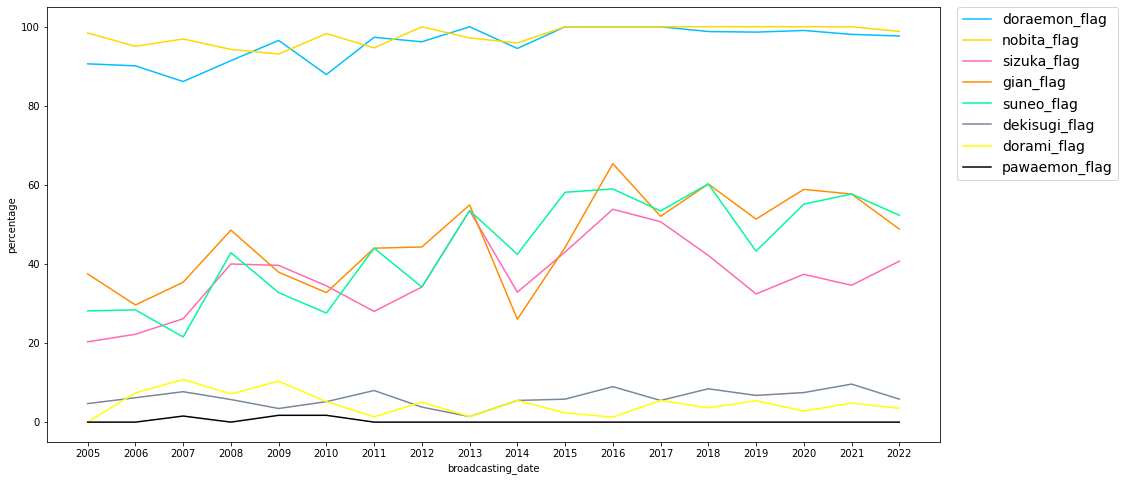

In [38]:
colors = ['#00bfff', '#ffd700', '#ff69b4', '#ff8c00', '#00fa9a', '#778899', '#ffff00', '#000000']

plt.figure(figsize=(16,8))
sns.lineplot(x=joined_stories_df['broadcasting_date'].astype(str), y=joined_stories_df['percentage'], hue=joined_stories_df['variable'], palette=sns.color_palette(colors))
plt.legend(bbox_to_anchor=(1.20, 1.0), loc='upper right', borderaxespad=0, fontsize=14)
# plt.tick_params(axis='x', labelrotation=90)


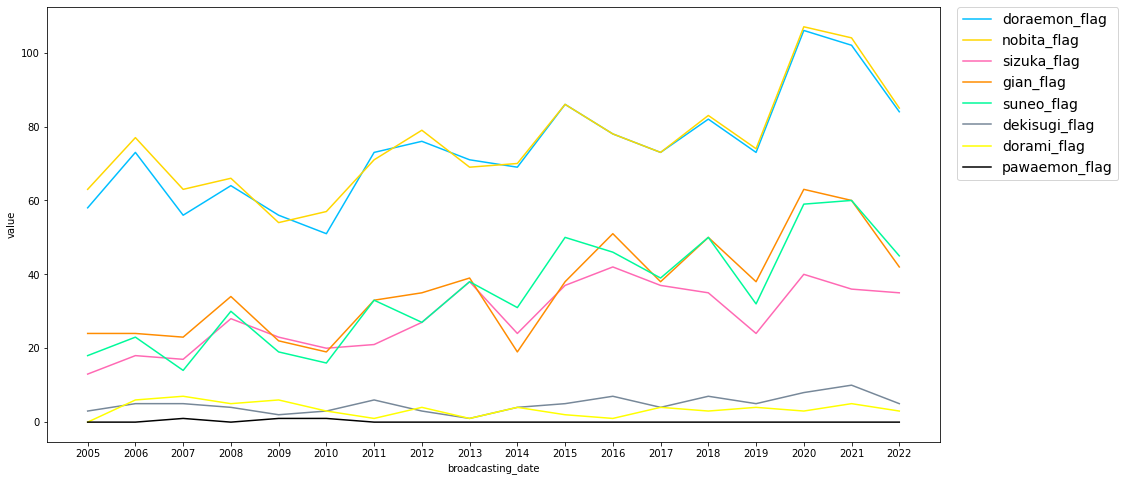

In [39]:
plt.figure(figsize=(16,8))
sns.lineplot(x=joined_stories_df['broadcasting_date'].astype(str), y=joined_stories_df['value'], hue=joined_stories_df['variable'], palette=sns.color_palette(colors))
plt.legend(bbox_to_anchor=(1.20, 1.0), loc='upper right', borderaxespad=0, fontsize=14)
# plt.tick_params(axis='x', labelrotation=90)
